<a href="https://colab.research.google.com/github/vifirsanova/ml-course/blob/main/tutorials/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия

- метод статистического анализа
- моделирует зависимости между одной зависимой переменной и одной или несколькими независимыми переменными
- ищет найти наилучшую прямую (или гиперплоскость в случае нескольких переменных), которая минимизирует ошибку предсказаний

#### **Компоненты:**

**Модель линейной регрессии**:

$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon$

где:

- $y$ — зависимая (объясняемая) переменная,
- $x_1, x_2, \dots, x_n$ — независимые переменные,
- $\beta_0$ — свободный член (или интерцепт), который ищет точку пересечения линии с осью Y, это константа, иногда она не используется (как точка отсчета для вычисления линейной регрессии), это значение функция принимает при нулевом значении всех факторов,
- $\beta_1, \beta_2, \dots, \beta_n$ — коэффициенты, которые определяют наклон регрессионной линии для каждой независимой переменной, это наши параметры
- $\epsilon$ — случайная ошибка (непредсказуемая часть) моделирует непредсказуемые колебания в данных, например, условия окружающей среды, точность измерительного прибора, человеческий фактор

**Формулировка задачи**:

На основе обучающих данных (пары $x$ и $y$) найти такие значения коэффициентов $\beta_0, \beta_1, \dots, \beta_n$, которые минимизируют ошибку
   
Мы используем метод наименьших квадратов:
   
$\text{SSE} = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$

где

- $y_i$ — реальные значения,
- $\hat{y}_i$ — то, что предсказала модель.

## Дата

[https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews](https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews)

1. Скачайте датасет **Amazon Reviews** с Kaggle
2. Загрузите данные в проект
3. Анализ данных:
  - вывести head
  - понять, какие типы анализа нужно провести именно здесь и зачем

Например, показать распределение классов, ответить на вопросы, сбалансированные данные или нет

Вывести облачко слов, частотность слов, распределение длин текстов в гистограммах, что еще можно визуализировать?

In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("data_short.csv")

# Просмотр первых строк данных
data.head()

,LABEL,TITLE,TEXT
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


#### Как восстановить баланс

**Oversampling**

Искусственное увеличение количества примеров редкого класса

Пример: повторное использование существующих примеров или генерации новых данных

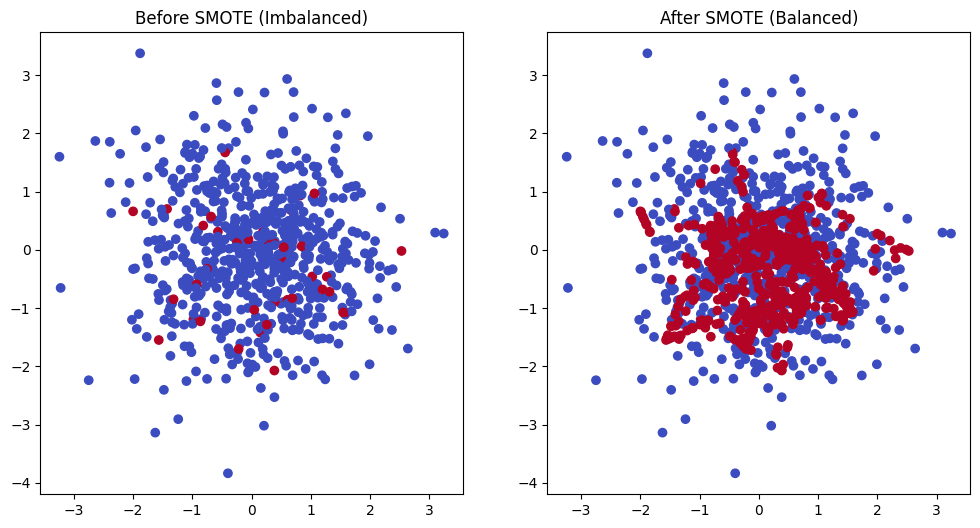

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       290
           1       0.64      0.70      0.67        10

    accuracy                           0.98       300
   macro avg       0.81      0.84      0.83       300
weighted avg       0.98      0.98      0.98       300



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Создаем синтетический набор данных с дисбалансом классов
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1, weights=[0.95], flip_y=0,
                           random_state=42)

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Визуализация исходных данных (до SMOTE) отражает дисбаланс классов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('Before SMOTE (Imbalanced)')

# Применяем SMOTE для увеличения редкого класса
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Визуализация после применения SMOTE (после сбалансированных данных)
plt.subplot(1, 2, 2)
plt.scatter(X_res[:, 0], X_res[:, 1], c=y_res, cmap='coolwarm')
plt.title('After SMOTE (Balanced)')

plt.show()

# Обучаем классификатор с логистической регрессией (логистическая регрессия)
clf = LogisticRegression(random_state=42)
clf.fit(X_res, y_res)

# Оценка модели на тестовых данных
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Этот код генерирует синтетический набор данных для задачи классификации с помощью функции `make_classification` из библиотеки `sklearn.datasets`

```python
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1, weights=[0.95], flip_y=0,
                           random_state=42)
```

1. **`n_samples=1000`**:
   - Указывает количество примеров в наборе данных.

2. **`n_features=20`**:
   - Определяет количество признаков (фич) в каждом примере.

3. **`n_informative=2`**:
   - Указывает количество информативных признаков, которые содержат полезную информацию для классификации.

4. **`n_redundant=10`**:
   - Указывает количество избыточных признаков, которые будут линейно зависимы от информативных признаков. Это значит, что эти 10 признаков будут быть комбинациями или производными от информативных признаков.

5. **`n_clusters_per_class=1`**:
   - Задает количество кластеров для каждого класса. В данном случае для каждого класса (например, 0 и 1) будет создан по одному кластеру.

6. **`weights=[0.95]`**:
   - Указывает пропорцию для классов. В данном случае класс 0 будет составлять 95% данных, а класс 1 — оставшиеся 5%. Это создает дисбаланс в данных.

7. **`flip_y=0`**:
   - Контролирует вероятность случайного изменения метки класса. Если `flip_y=0`, то метки классов не будут случайным образом изменяться, это помогает создать более чистые и предсказуемые данные.

8. **`random_state=42`**:
   - Устанавливает сид для генератора случайных чисел.

Какие метрики показывает репорт:

- **Precision (Точность):** Доля объектов, предсказанных как данный класс, которые действительно принадлежат этому классу.

  ${Precision} = \frac{TP}{TP + FP}$
- **Recall (Полнота):** Доля объектов данного класса, которые модель правильно определила.

  ${Recall} = \frac{TP}{TP + FN}$
- **F1-score:** Среднее гармоническое между precision и recall (важно, если классы несбалансированы).

  $F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$
- **Support:** Количество примеров в тестовой выборке для каждого класса.
- **Macro Average (Среднее арифметическое метрик по классам):** Простое среднее значение precision, recall и F1-score по классам.
- **Weighted Average (Взвешенное среднее):** Взвешенное среднее precision, recall и F1-score с учетом числа примеров в каждом классе.

**SMOTE (Synthetic Minority Over-sampling Technique)**

1. **Выбор примера из редкого класса**
   Для каждого примера из редкого класса SMOTE выбирает `k` ближайших соседей (параметр `k_neighbors`).

2. **Генерация синтетических примеров**
   - Выбирается случайный сосед из выбранных `k` ближайших.
   - Генерируется новый синтетический пример:
    - интерполяция: для каждого признака нового примера вычисляется среднее значение признака между исходным примером и его соседом

   ${New Example} = x_i + \lambda \cdot (x_j - x_i)$

   где:
   - $x_i$ — исходный пример (редкий класс),
   - $x_j$ — сосед (из множества ближайших соседей),
   - $lambda$ — случайное значение от 0 до 1 для интерполяции.

Процесс повторяется для всех примеров редкого класса, пока не будет достигнут желаемый баланс между классами.

**Undersampling** - обратная задача, где мы удаляем данные из доминирующего класса

**Метод взвешивания классов**

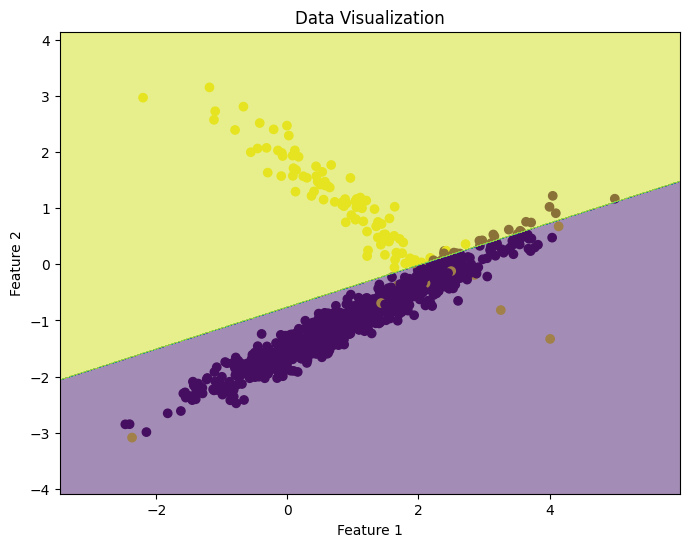

Class weights: {0: 0.5586592178770949, 1: 4.761904761904762}


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Генерируем несбалансированные данные
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
              n_redundant=0, n_clusters_per_class=1,
              weights=[0.9, 0.1], random_state=42)

# Вычисляем веса классов
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

# Создаем словарь с весами классов
class_weight_dict = dict(zip(np.unique(y), class_weights))

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем логистическую регрессию с использованием весов классов
model = LogisticRegression(class_weight=class_weight_dict)
model.fit(X_train, y_train)

# Визуализируем данные и разделяющую плоскость
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Visualization')

# Рисуем разделяющую плоскость
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
           np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5)
plt.show()

# Выводим веса классов
print("Class weights:", class_weight_dict)

- https://loginom.ru/blog/imbalance-class - другие методы сэмплинга

## Обучение модели

Очистим текстовые данные и применим векторизацию с помощью `CountVectorizer`.

In [ ]:

import re
from sklearn.feature_extraction.text import CountVectorizer

# Очистка текста: удаляем спецсимволы, цифры и приводим к нижнему регистру

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

# Применяем очистку к каждому отзыву
data['cleaned_review'] = data['TEXT'].apply(clean_text)

# Векторизация текста (преобразуем текст в числовое представление)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['cleaned_review'])

# Целевая переменная - оценки (от 1 до 5)
y = data['LABEL']

In [ ]:
data['cleaned_review'].head()

,cleaned_review
0,my lovely pat has one of the great voices of h...
1,despite the fact that i have only played a sma...
2,i bought this charger in jul and it worked ok...
3,check out maha energys website their powerex m...
4,reviewed quite a bit of the combo players and ...


In [ ]:
X[0]

<1x526 sparse matrix of type '<class 'numpy.int64'>'
	with 48 stored elements in Compressed Sparse Row format>

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html - тип данных, который у нас получается

In [ ]:
y[0]

2

Разделение данных на обучающую и тестовую выборки

In [19]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучение модели линейной регрессии

In [29]:
from sklearn.linear_model import LinearRegression

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели
model.fit(X_train, y_train)

LinearRegression()

Оценка модели

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

Mean Squared Error: 0.20664503318406546
R^2: 0.1389790283997272


**Метрики оценки линейной регрессии**  

Для оценки качества линейной регрессии часто используются **среднеквадратичная ошибка (MSE)** и **коэффициент детерминации (R²)**.

- Среднеквадратичная ошибка (MSE - Mean Squared Error)  

**Формула:**  

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

**Как интерпретировать?**  
- MSE измеряет среднюю квадратичную ошибку предсказаний.  
- Чем меньше MSE, тем точнее модель.  
- MSE чувствителен к выбросам, так как ошибки возводятся в квадрат.  

- Коэффициент детерминации (R² - R-squared)  

**Формула:**  

$R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$

где

$\bar{y}$ — среднее значение целевой переменной.

**Как интерпретировать?**  
- Показывает, насколько хорошо модель объясняет вариативность данных.  
- $R^2 \in [0, 1]$
- $R^2 \approx 1$ означает, что модель хорошо объясняет данные.  
- $R^2 \approx 0$ означает, что модель предсказывает хуже, чем просто среднее значение.  

В линейной регрессии нет параметра для задания количества эпох, потому что этот алгоритм использует аналитическое решение (метод наименьших квадратов) и не требует итеративного обучения.

Дискуссионные вопросы:

1. Назовите основной недостаток линейной модели.
2. Какие способы предобработки данных могут улучшить результаты?